# Training Classifiers
### Procedures:
- Add your collected dataset to variable [your_org]_dataset
- Split your dataset by article in to tuples of (article, 'news_org') and append to docs
- Tokenize words, then append them to all_words
- In the Visualization cell, add your news org to the classes list

CNN Word Frequency Distribution


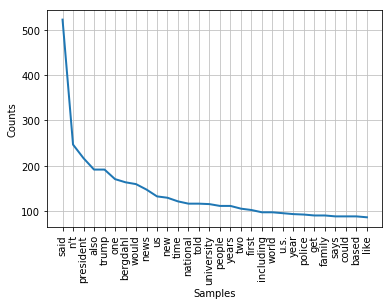

BBC Word Frequency Distribution


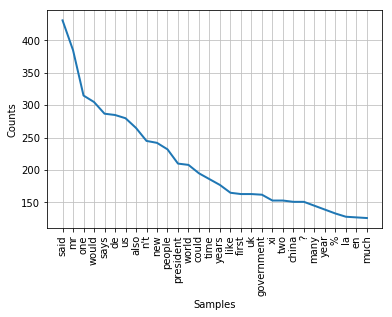

NYT Word Frequency Distribution


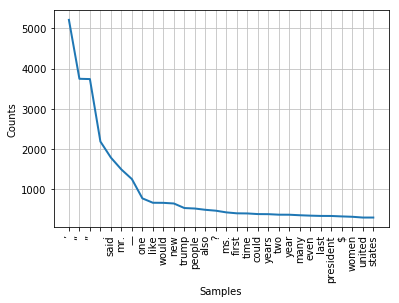

FOX Word Frequency Distribution


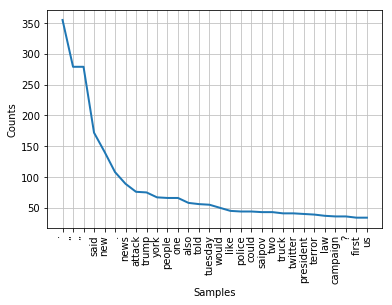

ALJ Word Frequency Distribution


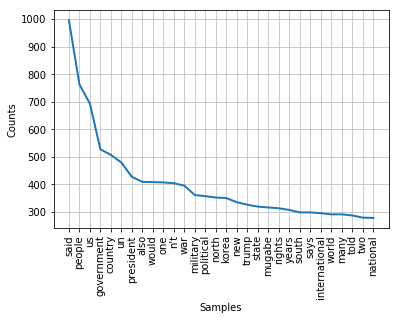

Length of featuresets: 1178


In [1]:
# -*- coding: utf-8 -*-

import nltk
import random 
import numpy
import scipy
import pickle
from nltk.corpus import stopwords

#############################################
# ADD YOUR DATASET HERE
cnn_dataset = open('./Datasets/clean_cnn_dataset', 'r', encoding='utf-8').read()
bbc_dataset = open('./Datasets/clean_bbc_dataset', 'r', encoding='utf-8').read()
nyt_dataset = open('./Datasets/clean_nyt_dataset', 'r', encoding='utf-8').read()
fox_dataset = open('./Datasets/clean_fox_dataset', 'r', encoding='utf-8').read()
alj_dataset = open('./Datasets/clean_alj_dataset', 'r', encoding='utf-8').read()

#############################################


docs = []
all_words = set()

#################################################
# APPEND TUPLES TO DOC
for r in cnn_dataset.split('\n'):
    docs.append((r, 'cnn'))
    
for r in bbc_dataset.split('\n'):
    docs.append((r, 'bbc'))
    
for r in nyt_dataset.split('\n'):
    docs.append((r, 'nyt'))
    
for r in fox_dataset.split('\n'):
    docs.append((r, 'fox'))
    
for r in alj_dataset.split('\n'):
    docs.append((r, 'alj'))
    


# TOKENIZE    
cnn_words = nltk.word_tokenize(cnn_dataset)
bbc_words = nltk.word_tokenize(bbc_dataset)
nyt_words = nltk.word_tokenize(nyt_dataset)
fox_words = nltk.word_tokenize(fox_dataset)
alj_words = nltk.word_tokenize(alj_dataset)

print("CNN Word Frequency Distribution")
fd = nltk.FreqDist(cnn_words)
fd.plot(30)
print("BBC Word Frequency Distribution")
fd = nltk.FreqDist(bbc_words)
fd.plot(30)
print("NYT Word Frequency Distribution")
fd = nltk.FreqDist(nyt_words)
fd.plot(30)
print("FOX Word Frequency Distribution")
fd = nltk.FreqDist(fox_words)
fd.plot(30)
print("ALJ Word Frequency Distribution")
fd = nltk.FreqDist(alj_words)
fd.plot(30)

# APPEND LOWERCASE WORDS TO ALL WORDS
for w in cnn_words:
    all_words.add(w.lower())
    
for w in bbc_words:
    all_words.add(w.lower())

for w in nyt_words:
    all_words.add(w.lower())
    
for w in fox_words:
    all_words.add(w.lower())
    
for w in alj_words:
    all_words.add(w.lower())
    
###################################################    
    
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())

def find_features(doc):
    words = nltk.word_tokenize(doc)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(art), org) for (art, org) in docs]
random.shuffle(featuresets)

# CHANGE SIZE OF TRAINING AND TESTING SETS HOW YOU SEE FIT
print('Length of featuresets:', len(featuresets))
pickle.dump( featuresets, open( "Featuresets/featuresets.pickle", "wb" ) )
train_set, test_set = featuresets[200:], featuresets[:200]

In [2]:
#print(featuresets[0])
#X, y = list(zip(*featuresets))
#print(X[0])
#print(y[0])

## Naive Bayes Classifier

In [3]:
featuresets = pickle.load( open( "Featuresets/featuresets.pickle", "rb" ) )
train_set, test_set = featuresets[200:], featuresets[:200]

classifier = nltk.NaiveBayesClassifier.train(train_set)
print("NB Acc:", nltk.classify.accuracy(classifier, test_set) * 100)
classifier.show_most_informative_features(25)

NB Acc: 73.0
Most Informative Features
                     mr. = True              nyt : fox    =     91.8 : 1.0
                      mr = True              bbc : fox    =     85.8 : 1.0
                       ’ = True              nyt : bbc    =     84.0 : 1.0
                       ” = True              nyt : bbc    =     81.6 : 1.0
                       — = True              nyt : bbc    =     69.8 : 1.0
                       “ = True              nyt : alj    =     69.6 : 1.0
                     ms. = True              nyt : fox    =     52.5 : 1.0
                       ‘ = True              nyt : alj    =     52.0 : 1.0
                  crisis = True              alj : fox    =     48.8 : 1.0
                  source = True              alj : fox    =     43.9 : 1.0
                       ’ = False             cnn : nyt    =     43.8 : 1.0
                      pm = True              cnn : nyt    =     43.7 : 1.0
                coverage = True              cnn : fox    =  

## Stochastic Gradient Descent Classifier

In [4]:
from collections import defaultdict
from nltk.classify import SklearnClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.probability import FreqDist, DictionaryProbDist, ELEProbDist, sum_logs
import nltk
import numpy as np
import pickle


class SKLearnWrapper(SklearnClassifier):
    
    def print_informative_features(self, length=10):
        feature_names = self._vectorizer.get_feature_names()
        top_list = []
        print(''.join([ "{:<20}".format(label) for label in self.labels()]))
        for i, label in enumerate(self.labels()):
            top = np.argsort(self._clf.coef_[i])[-length:]
            top = [feature_names[j] for j in top]
            top_list.append(top)
            #print("%s: %s" % (label, " ".join(feature_names[j] for j in top)))
        for i in range(1, length+1):
            print(''.join(["{:<20}".format(top[-i]) for top in top_list]))
    
    
# Loading in Featuresets
featuresets = pickle.load( open( "Featuresets/featuresets.pickle", "rb" ) )
train_set, test_set = featuresets[200:], featuresets[:200]

# Training and results with SGD
SGD_classifier = SKLearnWrapper(SGDClassifier(loss="hinge", penalty="elasticnet", alpha=0.1))
SGD_classifier.train(train_set)
print("SGD Acc:", nltk.classify.accuracy(SGD_classifier, test_set) * 100)
SGD_classifier.print_informative_features(25)

SGD Acc: 82.0
alj                 bbc                 cnn                 fox                 nyt                 
source              mr                  pm                  truck               —                   
0                   uk                  joining             🤔                   ”                   
author              🤔                   university          engagements.brig    “                   
//                  engines             u.s.                english-language    mr.                 
capital             english.he          stories             english-chinese     .                   
percent             english-speaking    based               english             ’                   
rights              english-language    reporting           england.but         ms.                 
human               english-chinese     team                england             ‘                   
asia                english             enjoining           engines          

## Visualization

    |      n      f      a      c      b |
    |      y      o      l      n      b |
    |      t      x      j      n      c |
----+------------------------------------+
nyt | <28.5%>     .      .      .      . |
fox |   5.5% <18.5%>     .      .      . |
alj |   0.5%      . <21.5%>     .      . |
cnn |      .   4.0%   2.5%  <5.0%>  2.0% |
bbc |      .      .   3.5%      .  <8.5%>|
----+------------------------------------+
(row = reference; col = test)



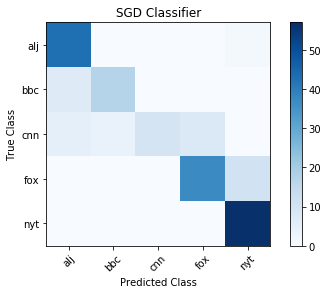

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np

#print('Size of test_set', len(test_set))
#for test in test_set:
#    if(test[1] == 'fox'):
#        print(test[0])
        
ref = [org for (art, org) in test_set]
test = [SGD_classifier.classify(art) for (art, org) in test_set]

cm = nltk.ConfusionMatrix(ref, test)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))


sklcm = confusion_matrix(ref, test)
np.set_printoptions(precision=2)

def plot_cm(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
plt.figure()
plot_cm(sklcm, classes=SGD_classifier.labels(), title='SGD Classifier')
plt.show()

## Save Classifiers

In [6]:
# Save Classifiers
import pickle

#pickle.dump(classifier, open('./Classifiers/classifier.pickle', 'wb'))
pickle.dump(SGD_classifier, open('./Classifiers/sgd_classifier.pickle', 'wb'))